In [3]:
import os
if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
print('workbookDir: ' + workbookDir)
os.chdir(workbookDir)
os.chdir("../papers/pyfly/pyfly/")

workbookDir: /home/user/Documents/Github/Uni/Master/tum-adlr-ws20-08/PyFly101


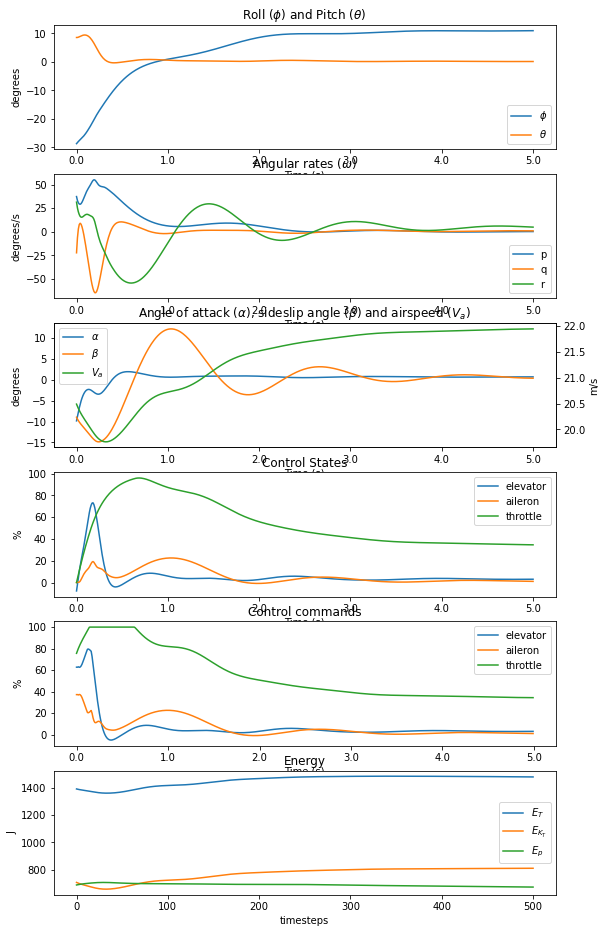

In [4]:
from pyfly.pyfly import PyFly
from pyfly.pid_controller import PIDController
import numpy as np

sim = PyFly("pyfly_config.json", "x8_param.mat")
sim.seed(0)

sim.reset(state={"roll": -0.5, "pitch": 0.15})

pid = PIDController(sim.dt)
pid.set_reference(phi=0.2, theta=0, va=22)

for step_i in range(500):
    phi = sim.state["roll"].value
    theta = sim.state["pitch"].value
    Va = sim.state["Va"].value
    omega = [sim.state["omega_p"].value, sim.state["omega_q"].value, sim.state["omega_r"].value]

    action = pid.get_action(phi, theta, Va, omega)
    success, step_info = sim.step(action)

    if not success:
        break

sim.render(block=True)